In [178]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import glob
from collections import Counter

In [87]:
google_vocab_k_nk = "vocab_cs_mod.txt"
google_vocab_raw_freqs = "google_vocab_rawwordfreqs.txt"
data = {}
f = open(google_vocab_k_nk,'r')
vocab = f.read().split()
f.close()
for i in range(0, len(vocab),2):
    k = int(vocab[i])
    nk = int(vocab[i+1])
    data[k] = nk
sorted_by_k = {k: v for k, v in sorted(data.items(), key=lambda item: item[0])}

In [88]:
rf = open(google_vocab_raw_freqs, 'r')
raw_word_freqs =rf.read().split() 
rf.close()
raw_word_freqs = [int(count) for count in raw_word_freqs]
print(min(raw_word_freqs), max(raw_word_freqs))

200 95119665584


# complementary cumulative distribution function (CCDF)

$$ P(x' >=x) = \sum _{x'=x}^{\infty} P(x')  $$

$$ P(x' >=x) \propto x'^{−(\gamma−1)} $$

$$ P(x = k) = N_{k} $$

$$ P(x' >=k) = \sum _{x'=k}^{\infty} N_{x'}  $$

In [89]:
# find sum(nk) for k' = k to k' = k_max, plot k vs CCDF?
def get_ccdf(data:dict):
    ccdf = {}
    N_k = list(data.values())
    k = list(data.keys())
    for i in range(len(list(data.keys()))):
        ccdf[k[i]] = np.sum(N_k[i:])
    return ccdf

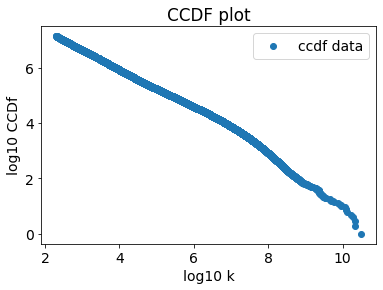

In [90]:
fig, ax = plt.subplots()
x_data = list(ccdf.keys())
y_data = list(ccdf.values())
ax.scatter(np.log10(x_data), np.log10(y_data), label = "ccdf data")
ax.set_xlabel("log10 k")
ax.set_ylabel("log10 CCDf")
ax.set_title("CCDF plot")
# find line of best fit
# a, b = np.polyfit(x_data,y_data, 1)
# ax.plot(x_data, a*np.array(x_data)+b, color= 'r', label = "line {}x+{}".format(round(a,2), round(b,2)))
plt.legend()
plt.savefig("ccdf_google_words_freq.png")
plt.show()

In [91]:
# two scaling regions: log10k = 2 to 6 and 5 to 9
section1_data = { k:v for k,v in ccdf.items() if np.log10(k) > 2 and np.log10(k) < 7.5}
section2_data = { k:v for k,v in ccdf.items() if np.log10(k) >= 7.5 and np.log10(k) < 9}

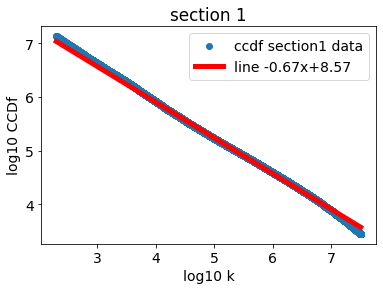

In [92]:
# plot regression line on section1_data
fig, ax = plt.subplots()
x_data = list(section1_data.keys())
y_data = list(section1_data.values())
ax.scatter(np.log10(x_data), np.log10(y_data), label = "ccdf section1 data")
ax.set_xlabel("log10 k")
ax.set_ylabel("log10 CCDf")
ax.set_title("section 1")
# find line of best fit
a, b = np.polyfit(np.log10(x_data),np.log10(y_data), 1)
ax.plot(np.log10(x_data), a*np.array(np.log10(x_data))+b, color= 'r', linewidth=5.0, label = "line {}x+{}".format(round(a,2), round(b,2)))
plt.legend()
plt.savefig("ccdf_section1_google.png")
plt.show()

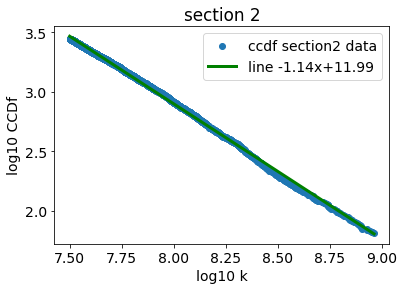

In [93]:
# plot regression line on section2_data
fig, ax = plt.subplots()
x_data = list(section2_data.keys())
y_data = list(section2_data.values())
ax.scatter(np.log10(x_data), np.log10(y_data), label = "ccdf section2 data")
ax.set_xlabel("log10 k")
ax.set_ylabel("log10 CCDf")
ax.set_title("section 2")
# find line of best fit
a, b = np.polyfit(np.log10(x_data),np.log10(y_data), 1)
ax.plot(np.log10(x_data), a*np.array(np.log10(x_data))+b, color= 'g',linewidth=3.0, label = "line {}x+{}".format(round(a,2), round(b,2)))
plt.legend()
plt.savefig("ccdf_section2_google.png")
plt.show()

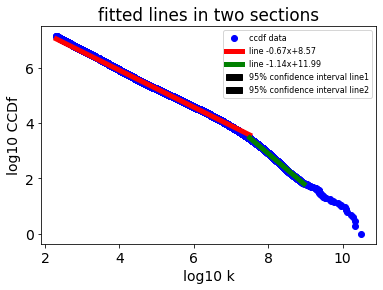

In [202]:
# combine plots
fig, ax = plt.subplots()
x_data = list(ccdf.keys())
y_data = list(ccdf.values())
ax.scatter(np.log10(x_data), np.log10(y_data), color = 'b', label = "ccdf data")
ax.set_xlabel("log10 k")
ax.set_ylabel("log10 CCDf")
ax.set_title("fitted lines in two sections")
# find line of best fit
x1_data = list(section1_data.keys())
y1_data = list(section1_data.values())
x2_data = list(section2_data.keys())
y2_data = list(section2_data.values())
a1, b1 = np.polyfit(np.log10(x1_data),np.log10(y1_data), 1)
x_line1 = np.linspace(min(np.log10(x1_data)),max(np.log10(x1_data)), 100)
y_line1 = a1*x_line1+b1
a2, b2 = np.polyfit(np.log10(x2_data),np.log10(y2_data), 1)
x_line2 = np.linspace(min(np.log10(x2_data)),max(np.log10(x2_data)), 100)
y_line2 = a2*x_line2+b2
CI_1 = get_ci(np.log10(x1_data), np.log10(y1_data), a1, b1)
CI_2 = get_ci(np.log10(x2_data), np.log10(y2_data), a2, b2)
ax.plot(x_line1, y_line1, color= 'r', linewidth = 5, label = "line {}x+{}".format(round(a1,2), round(b1,2)))
ax.plot(x_line2, y_line2, color= 'g', linewidth = 5, label = "line {}x+{}".format(round(a2,2), round(b2,2)))
ax.fill_between(x_line1, y_line1 + CI_1, y_line1 - CI_1, color = 'black', label = '95% confidence interval line1')
ax.fill_between(x_line2, y_line2 + CI_2, y_line2 - CI_2, color = 'black', label = '95% confidence interval line2')
plt.legend(bbox_to_anchor=(1, 1), fontsize=8)
plt.savefig("ccdf_fitted_lines.png")
plt.show()

# Zipf

In [203]:
gamma_1 = a1
gamma_2 = a2

In [197]:
# Plot Zipf of google data
# We have 95119665584 words and theirs corresponding frequency of appearance.
# Rank = frequency/num_words
num_words = len(raw_word_freqs)
raw_word_freqs_sub_sampled = raw_word_freqs[0:num_words:100]
zipf_rank = {i+1: freq for i,freq in enumerate(raw_word_freqs_sub_sampled)}
print("--- done")

--- done


# Word Frequencies as a f(rank)

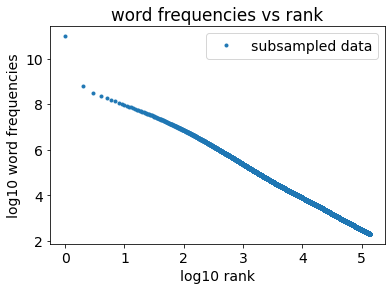

In [198]:
# plot  on zipf
fig, ax = plt.subplots()
x_data_rank = list(zipf_rank.keys())
y_data_word_freq = list(zipf_rank.values())
ax.plot(np.log10(x_data_rank), np.log10(y_data_word_freq),'.',  label = "subsampled data")
ax.set_xlabel("log10 rank")
ax.set_ylabel("log10 word frequencies")
ax.set_title("word frequencies vs rank")
# # # find line of best fit
# a, b = np.polyfit(np.log10(x_data_rank),np.log10(y_data_word_freq), 1)
# ax.plot(np.log10(x_data_rank), a*np.array(np.log10(x_data_rank))+b, color= 'g',linewidth=3.0, label = "line {}x+{}".format(round(a,2), round(b,2)))
plt.legend()
plt.savefig("zipf_word_freq_vs_rank.png")
plt.show()

In [199]:
# fit two sections
# two scaling regions: log10rank = 0 to 6 and 5 to 9
section1_rank = { k:v for k,v in zipf_rank.items() if np.log10(k) > 0 and np.log10(k) < 2 }
section2_rank = { k:v for k,v in zipf_rank.items() if np.log10(k) >= 2 and np.log10(k) < 5}

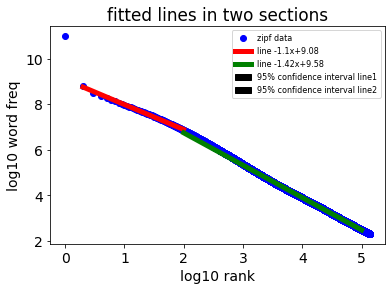

In [204]:
# combine plots
fig, ax = plt.subplots()
x_data = x_data_rank
y_data = y_data_word_freq
ax.scatter(np.log10(x_data), np.log10(y_data), color = 'b', label = "zipf data")
ax.set_xlabel("log10 rank")
ax.set_ylabel("log10 word freq")
ax.set_title("fitted lines in two sections")
# find line of best fit
x1_data = list(section1_rank.keys())
y1_data = list(section1_rank.values())
x2_data = list(section2_rank.keys())
y2_data = list(section2_rank.values())
a1, b1 = np.polyfit(np.log10(x1_data),np.log10(y1_data), 1)
x_line1 = np.linspace(min(np.log10(x1_data)),max(np.log10(x1_data)), 100)
y_line1 = a1*x_line1+b1
a2, b2 = np.polyfit(np.log10(x2_data),np.log10(y2_data), 1)
x_line2 = np.linspace(min(np.log10(x2_data)),max(np.log10(x2_data)), 100)
y_line2 = a2*x_line2+b2
CI_1 = get_ci(np.log10(x1_data), np.log10(y1_data), a1, b1)
CI_2 = get_ci(np.log10(x2_data), np.log10(y2_data), a2, b2)
ax.plot(x_line1, y_line1, color= 'r', linewidth = 5, label = "line {}x+{}".format(round(a1,2), round(b1,2)))
ax.plot(x_line2, y_line2, color= 'g', linewidth = 5, label = "line {}x+{}".format(round(a2,2), round(b2,2)))
ax.fill_between(x_line1, y_line1 + CI_1, y_line1 - CI_1, color = 'black', label = '95% confidence interval line1')
ax.fill_between(x_line2, y_line2 + CI_2, y_line2 - CI_2, color = 'black', label = '95% confidence interval line2')
plt.legend(bbox_to_anchor=(1, 1), fontsize=8)
plt.savefig("zipf_fitted_lines.png")
plt.show()

In [218]:
alpha_1 = 1.1
alpha_2 = 1.42
gamma_1 = 0.67
gamma_2 = 1.14

7.142857142857148


In [222]:
1/gamma_1
1/gamma_2

0.8771929824561404

In [230]:
from collections import OrderedDict 

# Baby Names Data

In [231]:
baby_names_files = glob.glob("data/*")
names_boys_1952_file_name = "data/names-boys1952.txt"
names_boys_2002_file_name = "data/names-boys2002.txt"
names_girls_1952_file_name = "data/names-girls1952.txt"
names_girls_2002_file_name = "data/names-girls2002.txt"
required_names = [names_boys_1952_file_name,names_boys_2002_file_name,names_girls_1952_file_name, names_girls_2002_file_name]
baby_names_data = {}
for f_name in required_names:
    f = open(f_name,'r')
    key = f_name.replace("data/names-", "")
    key = key.replace(".txt", "")
    data = f.read().split()
    records = np.array([s.split(",") for s in data])
    names = records[:,0]
    freqs = records[:,2]
    freqs = [int(freq) for freq in freqs]
    # zipf
    sorted_freqs = sorted(freqs, reverse = True)
    zipf_rank = {i+1: freq for i,freq in enumerate(sorted_freqs)}
    # get k and nk
    counter = Counter(freqs)
    sorted_keys = sorted(list(counter.keys()))
    k_freq_dict = dict(zip(list(counter.keys()), list(counter.values())))
    k_freq_dict = OrderedDict(sorted(k_freq_dict.items()))
    ccdf = get_ccdf(k_freq_dict)
    name_freq_dict = {name: freq for name,freq in zip(names, freqs)}
    name_freq_dict = {k:v for k,v in sorted(name_freq_dict.items(), key = lambda item: item[1], reverse = True)}
    baby_names_data[key] = {"names_freq": name_freq_dict, "k_freq": k_freq_dict, "ccdf": ccdf, "zipf": zipf_rank}
    f.close()   
print("done")

done


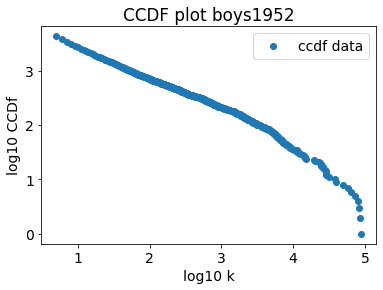

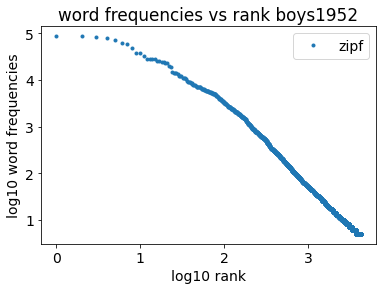

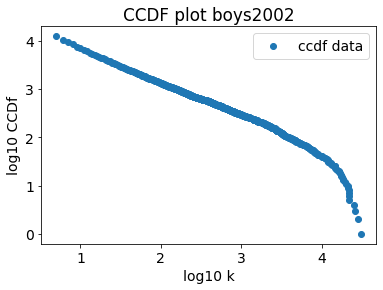

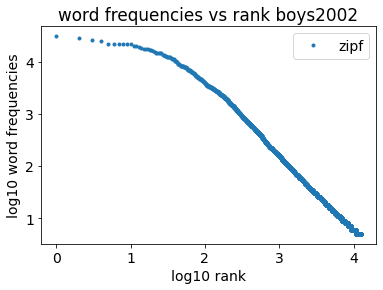

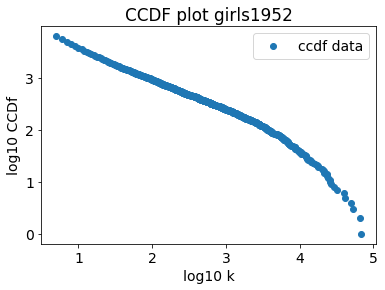

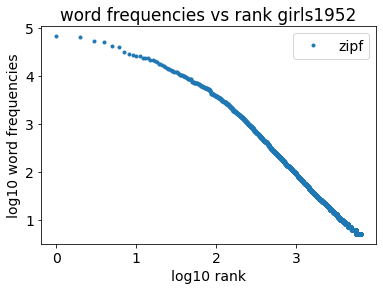

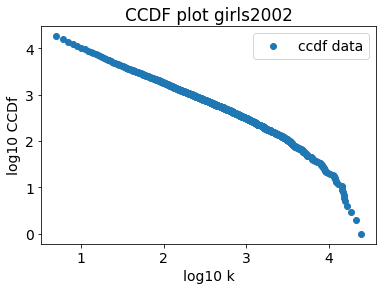

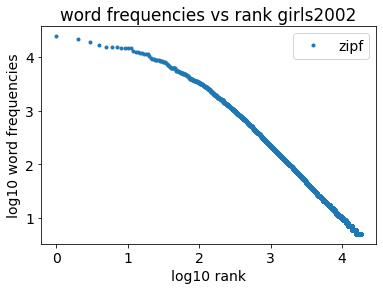

In [232]:
for key in baby_names_data.keys():
    # plot ccdf
    ccdf = baby_names_data[key]["ccdf"]
    fig, ax = plt.subplots()
    x_data = list(ccdf.keys())
    y_data = list(ccdf.values())
    ax.scatter(np.log10(x_data), np.log10(y_data), label = "ccdf data")
    ax.set_xlabel("log10 k")
    ax.set_ylabel("log10 CCDf")
    ax.set_title("CCDF plot " + key)
    plt.legend()
    plt.savefig("ccdf" + key +".png")
    # plot Zipf
    fig, ax = plt.subplots()
    zipf_rank = baby_names_data[key]["zipf"]
    x_data_rank = list(zipf_rank.keys())
    y_data_word_freq = list(zipf_rank.values())
    ax.plot(np.log10(x_data_rank), np.log10(y_data_word_freq),'.',  label = "zipf")
    ax.set_xlabel("log10 rank")
    ax.set_ylabel("log10 word frequencies")
    ax.set_title("word frequencies vs rank " + key)
    plt.legend()
    plt.savefig("zipf_plot"+key+".png")


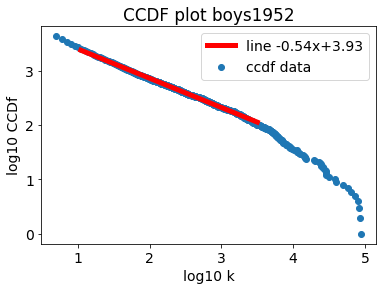

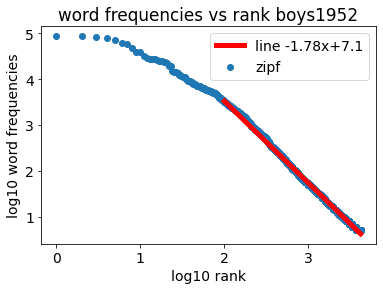

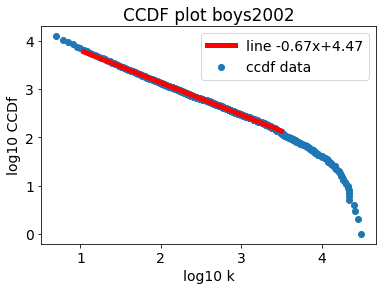

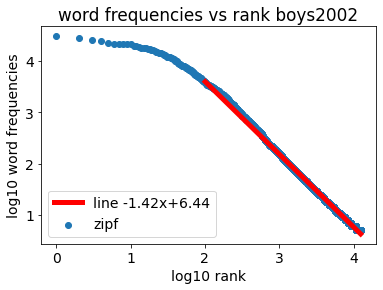

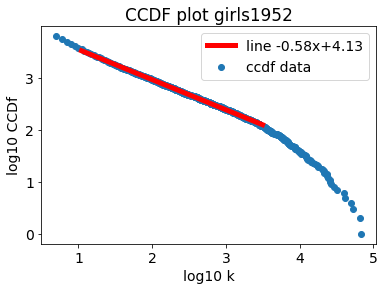

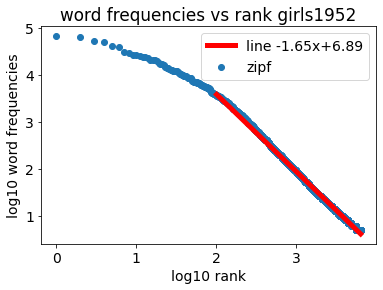

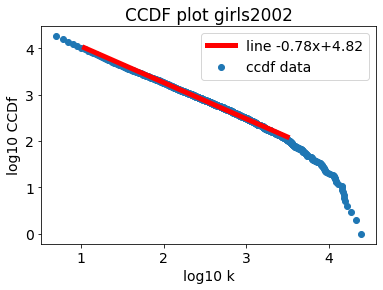

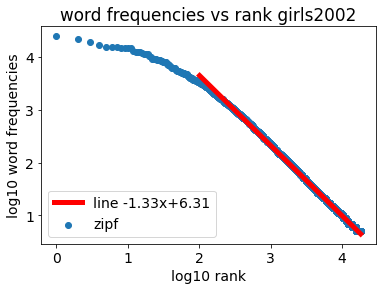

In [274]:
for key in baby_names_data.keys():
    # plot ccdf
    ccdf = baby_names_data[key]["ccdf"]
    fig, ax = plt.subplots()
    x_data_k = list(ccdf.keys())
    y_data_freq = list(ccdf.values())
    section_k = { k:v for k,v in ccdf.items() if np.log10(k) >1 and np.log10(k) < 3.5}
    x_data_section_k = list(section_k.keys())
    y_data_section_freq = list(section_k.values())
    gamma_plus_1, c1 = np.polyfit(np.log10(x_data_section_k),np.log10(y_data_section_freq), 1)
    x_line_k = np.linspace(min(np.log10(x_data_section_k)),max(np.log10(x_data_section_k)), 100)
    y_line_ccdf = gamma_plus_1*x_line_k+c1
    ax.plot(x_line_k, y_line_ccdf, color= 'r', linewidth = 5, label = "line {}x+{}".format(round(gamma_plus_1,2), round(c1,2)))
    ax.scatter(np.log10(x_data_k), np.log10(y_data_freq), label = "ccdf data")
    ax.set_xlabel("log10 k")
    ax.set_ylabel("log10 CCDf")
    ax.set_title("CCDF plot " + key)
    plt.legend()
    plt.savefig("line_ccdf" + key +".png")
    # plot Zipf
    fig, ax = plt.subplots()
    zipf_rank = baby_names_data[key]["zipf"]
    x_data_rank = list(zipf_rank.keys())
    y_data_word_freq = list(zipf_rank.values())
    section_rank = { k:v for k,v in zipf_rank.items() if np.log10(k) > 2 }
    x_data_section_rank = list(section_rank.keys())
    y_data_section_word_freq = list(section_rank.values())
    alpha, c2 = np.polyfit(np.log10(x_data_section_rank),np.log10(y_data_section_word_freq), 1)
    x_line_rank = np.linspace(min(np.log10(x_data_section_rank)),max(np.log10(x_data_section_rank)), 100)
    y_line_rankfreq = alpha*x_line_rank+c2
    ax.plot(x_line_rank, y_line_rankfreq, color= 'r', linewidth = 5, label = "line {}x+{}".format(round(alpha,2), round(c2,2)))
    ax.scatter(np.log10(x_data_rank), np.log10(y_data_word_freq),  label = "zipf")
    ax.set_xlabel("log10 rank")
    ax.set_ylabel("log10 word frequencies")
    ax.set_title("word frequencies vs rank " + key)
    plt.legend()
    plt.savefig("line_zipf_plot_"+key+".png")


In [ ]:
list_filtered = [ i for i in data_list if np.log10(i[1])> min_val and np.log10(i[1]) < max_val]